In [14]:
import pandas as pd
import seaborn as sb

In [13]:
df = pd.read_excel ('rpl_2021.xlsx') 
print(df.columns)

Index(['round', 'date', 'time', 'host_team', 'away_team', 'host_score',
       'away_score'],
      dtype='object')


В таблице результаты 240 матчей

Названия столбцов: 
  
round - номер тура  
date - дата матча  
time - время начала матча  
host_team - название команды хозяев  
away_team - название команды гостей  
host_score - счет команды хозяев  
away_score - счет команды гостей  

In [5]:
coeff_1_5 = [1.32, 1.2, 1.24, 1.24, 1.31, 1.26, 1.27, 1.24, 1.23, 1.26, 1.2, 1.2, 1.21]
coeff_2_5 = [1.92, 1.85, 1.71, 1.88, 1.64, 1.63, 1.68]

[1.32, 1.2, 1.24, 1.24, 1.31, 1.26, 1.27, 1.24, 1.23, 1.26, 1.2, 1.2, 1.21]
[1.92, 1.85, 1.71, 1.88, 1.64, 1.63, 1.68]


Списки коэффициентов на ТБ 1.5 и ТБ 2.5

План:

Общий
1. Количество голов в каждом матче
2. Средние коэффициенты
3. Сколько ставок сыграет
4. Суммарный выигрыш по каждой ставке
5. Суммарный доход по каждой ставке
6. Процент дохода от суммарных ставок
  
Выход в "0"
1. Необходиный процент победных ставок для "0"
2. Необходимый коэффициент для "0"
  
Распределение по командам
1. Самые забивающие команды
2. п.п. 3-5 общего расчета для этих команд
3. Самые пропускающие команды
4. п.п. 3-5 общего расчета для этих команд

## 1. Общие расчеты

### 1.1. Количество голов в каждом матче

In [11]:
host_score = df['host_score'] # списки очков команд
away_score = df['away_score']

In [19]:
total_score = [] # создание спискс суммарного счета игр
match_score = 0

for index in range(len(host_score)):
    match_score = host_score[index] + away_score[index]
    total_score.append(match_score)

print (total_score)

[2, 4, 4, 1, 3, 3, 1, 1, 1, 3, 5, 3, 2, 6, 1, 3, 2, 5, 3, 3, 2, 3, 3, 2, 3, 1, 3, 4, 2, 5, 2, 3, 2, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 1, 2, 2, 2, 2, 2, 4, 4, 4, 4, 3, 4, 2, 5, 6, 2, 5, 1, 0, 4, 1, 0, 3, 2, 2, 3, 3, 2, 2, 1, 1, 0, 0, 1, 3, 1, 3, 3, 4, 5, 4, 1, 2, 2, 2, 5, 5, 4, 4, 2, 1, 8, 3, 5, 1, 2, 3, 1, 1, 3, 0, 0, 1, 3, 5, 0, 6, 2, 4, 6, 2, 3, 3, 0, 4, 6, 3, 2, 2, 6, 0, 5, 2, 2, 4, 4, 1, 3, 1, 3, 3, 2, 3, 2, 2, 5, 2, 5, 2, 0, 3, 3, 1, 2, 2, 3, 5, 1, 5, 4, 2, 3, 2, 1, 3, 0, 5, 3, 0, 0, 2, 3, 3, 1, 2, 5, 3, 2, 7, 5, 2, 5, 0, 3, 3, 1, 1, 4, 0, 1, 1, 6, 1, 2, 1, 3, 3, 5, 2, 2, 4, 2, 3, 4, 2, 0, 3, 3, 5, 1, 5, 5, 1, 4, 5, 6, 3, 4, 3, 2, 2, 4, 1, 7, 4, 1, 1, 1, 0, 2, 1, 0, 3, 6, 3, 1, 3, 2, 1, 3, 3, 1, 3, 1, 6, 2, 4]


In [41]:
score_list = list(range(min(total_score),max(total_score)+1)) # подсчет кол-ва игр с указанным счетом
score_count = []

for index in score_list:
    counter = 0
    for score in total_score:
        if score == index:
            counter +=1
    score_count.append(counter)
    
print(score_count)

[18, 44, 56, 59, 26, 24, 10, 2, 1]


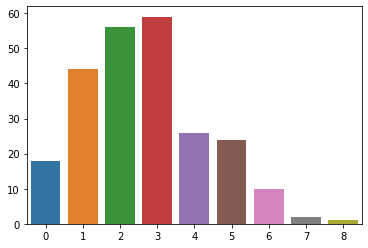

In [47]:
sb.barplot(x=score_list, y=score_count) # график кол-ва игр с указанным счетом

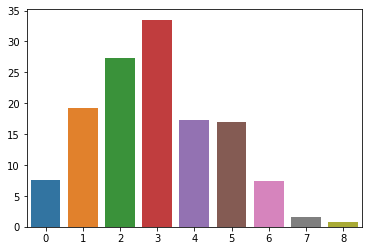

In [51]:
score_percentage =  score_count # график % игр с указанным счетом

for index in range(len(score_count)):
    score_percentage[index] = score_count[index] / sum(score_count) * 100
    
sb.barplot(x=score_list, y=score_percentage);

In [56]:
tb_1_5_count = 0
tb_2_5_count = 0

for score in total_score:
    if score > 1.5:
        tb_1_5_count += 1
        if score > 2.5:
            tb_2_5_count += 1

print(tb_1_5_count)
print(tb_2_5_count)

178
122
